对于给定的未来解决方案单词，在未来的日期，开发一个模型，使您能够预测报告结果的分布。换句话说，预测未来日期（1，2，3，4，5，6，X）的相关百分比。你的模型和预测有哪些不确定性？举一个具体的例子，说明你对2023年3月1日EERIE一词的预测。你对模型的预测有多自信？  

第一题模型中是只考虑时间的影响，不考虑单词的影响，现在需要加入单词的影响。单纯的一个单词无法进行量化，所以只能通过各种属性对单词进行表达。所以使用第一问的第二小问的相关参数一起建立回归模型即可。  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import nltk

plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

In [2]:
df = pd.read_excel('第一题表.xlsx', index_col=0)
df.head()

Date  Contest number   Word  Number of  reported results  \
0 2022-01-07             202  slump                        80630   
1 2022-01-08             203  crank                       101503   
2 2022-01-09             204  gorge                        91477   
3 2022-01-10             205  query                       107134   
4 2022-01-11             206  drink                       153880   

   Number in hard mode     1 try   2 tries    3 tries    4 tries    5 tries  \
0                 1362  1.000000  3.000000  23.000000  39.000000  24.000000   
1                 1763  1.000000  5.000000  23.000000  31.000000  24.000000   
2                 1913  1.000000  3.000000  13.000000  27.000000  30.000000   
3                 2242  1.000000  4.000000  16.000000  30.000000  30.000000   
4                 3017  0.990099  8.910891  34.653465  33.663366  15.841584   

   ...    JJR     MD    NN    NNS   PRP$     RB     VB    VBG    VBN   频数  
0  ...  False  False  True  False  False  False  False  False  False  382  
1  ...  False  False  True  False  False  False  False  False  False  487  
2  ...  False  False  True  False  False  False  False  False  False  553  
3  ...  False  False  True  False  False  False  False  False  False  448  
4  ...  False  False  True  False  False  False  False  False  False  413  

[5 rows x 28 columns]

对于使用时间，单词编号，单词词性等信息进行回归模型的建立，预测时，首先对日期处理，单词的属性进行处理，然后根据处理后的信息进行预测即可。    
常见回归模型有：svr,linearregression, cart, randomforest, xgboost  
对于多因变量的回归模型有：partial least squares   
可以分别对每一种尝试次数进行建模，或者一起进行建模。  
根据自己喜好选择合适的模型   
我们以pls为例

In [3]:
from sklearn.cross_decomposition import PLSRegression

# 注意：这是DS数模（公众号、面包多、知乎）团队制作的进阶思路，在公众号：DS数模，输入：美赛，
# 或加群：557421704，获取正版资源。有疑问，请务必购买正版，加入答疑群，可能现在的进阶版本并不完善，后期有问题也会更新。

# 替换删除了一些东西，在DS数模团队的C题答疑群内后续进行说明，请务必购买正版获取完整代码

In [4]:
y = df[df.columns[5:12]].values
columns = ['Contest number']+list(df.columns[12:])
X = df[columns]
X=X.drop(labels=['tag'], axis=1)
print(X.columns)
X=X.values

Index(['Contest number', 'week', 'is_weekend', 'word_len', 'DT', 'JJ', 'JJR',
       'MD', 'NN', 'NNS', 'PRP$', 'RB', 'VB', 'VBG', 'VBN', '频数'],
      dtype='object')


In [5]:
mae = []
mse = []
index = [i for i in range(1,15)]
for i in range(1,15):
    pls = PLSRegression(n_components=i)
    pls.fit(X, y)
    pre_y = pls.predict(X)
    mae.append(mean_absolute_error(pre_y, y))
    mse.append(mean_squared_error(pre_y, y))
mae_df = pd.DataFrame()
mae_df['n_componets']=[i for i in range(1, 15)]
mae_df['mae']=mae
mae_df['mse']=mse
mae_df.to_excel('第二题-不同成分数下模型精度表.xlsx')
mae_df


n_componets       mae        mse
0             1  3.284618  22.290875
1             2  3.225738  21.739441
2             3  3.218013  21.644431
3             4  3.209239  21.587225
4             5  3.201444  21.547958
5             6  3.201844  21.533568
6             7  3.196966  21.513102
7             8  3.196843  21.491037
8             9  3.195187  21.477754
9            10  3.194117  21.474069
10           11  3.193029  21.472641
11           12  3.191916  21.472133
12           13  3.191703  21.472096
13           14  3.191328  21.472077

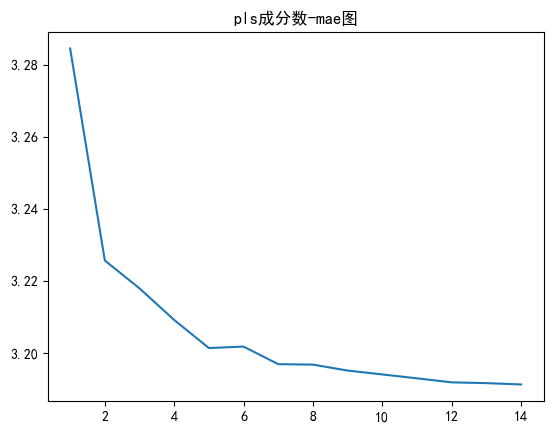

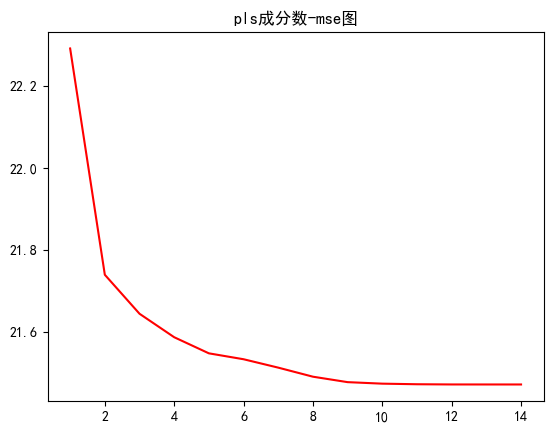

In [6]:
plt.plot(index, mae)
plt.title('pls成分数-mae图')
plt.savefig('第二题-pls成分数-mae图')
plt.show()
plt.plot(index, mse, c='r')
plt.title('pls成分数-mse图')
plt.savefig('第二题-pls成分数-mse图')
plt.show()

从上图可以看出，当成分数为5时基本趋于稳定，所以成分数选择5即可  

In [7]:
pls = PLSRegression(n_components=5)
pls.fit(X, y)
pre_y = pls.predict(X)
mean_absolute_error(pre_y, y)

3.2014440741501438

In [8]:
# 这里是导出pls所建立模型的系数，pls本身就是一种线性模型，
# 所以这里的系数约等于相关性，可以通过这里与第一问的第二小问进行相互印证
coef_df = pd.DataFrame(pls.coef_).T
coef_df.columns = columns[:4]+columns[5:]
coef_df['tries'] = [i for i in range(1,8)]
coef_df=coef_df[['tries']+columns[:4]+columns[5:]]
coef_df.to_excel('第二题-尝试次数与各属性关系表.xlsx')
coef_df

tries  Contest number      week  is_weekend  word_len        DT        JJ  \
0      1       -0.166349  0.023930    0.046032  0.174973  0.022180  0.019222   
1      2       -0.013792  0.130608   -0.057582  1.603348  0.250241  0.004707   
2      3        0.713861  0.291676   -0.135482  3.352896  0.382769  0.169124   
3      4        1.035950  0.090893   -0.095210  0.459816 -0.123221  0.091809   
4      5       -0.426568 -0.273747    0.075884 -2.492349 -0.307219 -0.029158   
5      6       -1.017621 -0.198584    0.196975 -2.305402 -0.218762 -0.109667   
6      7       -0.125481 -0.064777   -0.030618 -0.793281 -0.005989 -0.146037   

        JJR        MD        NN       NNS      PRP$        RB        VB  \
0 -0.008817  0.009381 -0.004389 -0.017889  0.067086 -0.021616 -0.022054   
1 -0.118315  0.083685  0.017737 -0.137379  0.309390 -0.240747  0.060658   
2 -0.568618  0.133997 -0.109684  0.006011  0.508611 -0.412027  0.191080   
3 -0.390951  0.007601 -0.096355  0.315629 -0.140963  0.011900  0.147752   
4  0.401249 -0.099497 -0.054290  0.064232 -0.409175  0.364439 -0.082871   
5  0.487080 -0.089578  0.093770 -0.102136 -0.235772  0.268678 -0.213856   
6  0.198371 -0.045590  0.153211 -0.128467 -0.099176  0.029373 -0.080708   

        VBG       VBN        频数  
0 -0.003373 -0.015662  0.161676  
1  0.020270  0.064915  1.651496  
2  0.101641  0.236139  2.478007  
3  0.049643  0.155948 -0.657545  
4 -0.013811 -0.137843 -1.907616  
5 -0.090826 -0.234414 -1.444014  
6 -0.063545 -0.069083 -0.282005

In [9]:
mae = []
mse = []
kfold = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kfold.split(X, y):
    train_X = X[train_index, :]
    train_y = y[train_index]
    test_X = X[test_index, :]
    test_y = y[test_index]
    pls = PLSRegression(n_components=5)
    pls.fit(train_X, train_y)
    pre_y = pls.predict(test_X)
    mae.append(mean_absolute_error(pre_y, test_y))
    mse.append(mean_squared_error(pre_y, test_y))
kfold_df = pd.DataFrame()
kfold_df['mae']=mae
kfold_df['mse']=mse
kfold_df.to_excel('第二题-十折交叉验证下模型精度表.xlsx')
kfold_df


mae        mse
0  3.392522  22.113347
1  2.876569  15.815992
2  3.172449  22.236849
3  3.404008  28.978066
4  3.663487  25.306459
5  3.127969  19.921376
6  3.476306  24.852974
7  3.563475  28.305225
8  3.645787  24.875650
9  3.197128  19.895545

可以看到目前mse是特别小的，说明预测精度很高。

预测

In [10]:
# 2023年3月1日EERIE
word = 'eerie'
day = int(str(datetime(2023, 3,1)-df['Date'][0]).split('days')[0])+202
tag = nltk.pos_tag([word])
words = pd.read_excel('字母频数.xlsx', index_col=0)
频数 = 0
for i in word:
    频数+=words['频数'][i]
week = datetime(2023, 3,1).weekday()
is_weekend = week>4
word_len = len(set(word))
X_columns = ['Contest number', 'week', 'is_weekend', 'word_len', 'DT', 'JJ', 'JJR',
       'MD', 'NN', 'NNS', 'PRP$', 'RB', 'VB', 'VBG', 'VBN', '频数']
predict_X = [False for i in X_columns]
predict_X[0]=day
predict_X[1]=week
predict_X[2]=is_weekend
predict_X[3]=word_len
predict_X[-1]=频数
predict_X=np.array(predict_X).reshape(1, -1)

pls = PLSRegression(n_components=1)
pls.fit(X, y)
pls.predict(predict_X)

array([[ 0.27603602,  4.07889106, 19.45737241, 32.94443295, 26.13023665,
        13.67714446,  3.43588644]])

你的模型和预测有哪些不确定性？  
对于模型而言，只要有固定的输入，则就会存在固定的输出。
可以从玩家的角度进行描述不确定性。
如：某一天的玩家数量突然剧增或者剧减，导致玩家分布与模型中玩家分布不一致。比如说突然来了一群中国玩家，英文水平比较差的，猜了好多次都猜不对，因为他根本就不会这个单词。

你对模型的预测有多自信？  
可以从交叉验证，mae,mse等角度进行描述。

In [ ]:
# 注意：这是DS数模（公众号、面包多、知乎）团队制作的进阶思路，在公众号：DS数模，输入：美赛，
# 或加群：557421704，获取正版资源。有疑问，请务必购买正版，加入答疑群，可能现在的进阶版本并不完善，后期有问题也会更新。

# 替换删除了一些东西，在DS数模团队的C题答疑群内后续进行说明，请务必购买正版获取完整代码